In [20]:
import pandas as pd
import os
import glob
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [21]:
hdulist = fits.open('../data/composite_Io_eclipsed.fits')
evt_data = Table(hdulist[1].data)
image_data = hdulist[1].data
df = pd.read_csv('../data/Io_Master_Line_List (1).csv') #spaces in csv file will make df object type and not float64
line = "S I"
target_mask = df.Species.str.endswith(line) #probably a better function but idk it right now
df = df[target_mask]
df_wavelength = df['Wavelength']
df_species = df['Species']

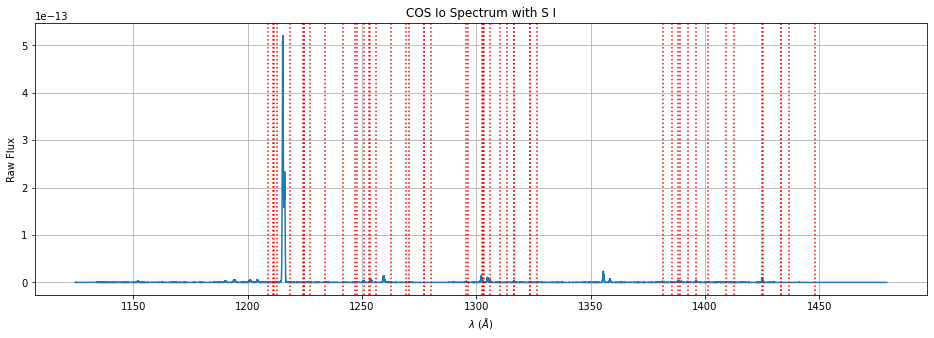

In [22]:
plt.figure(figsize=(16, 5))
plt.plot(evt_data['WAVELENGTH'].T, evt_data['FLUX'].T) #make it columns instead of rows bc otherwise will be a blank plot
plt.xlabel('$\lambda$ ($\AA$)');
plt.ylabel('Raw Flux')
plt.title("COS Io Spectrum with S I")
for xc in df_wavelength:
    plt.axvline(x=xc, color = 'red', linestyle = 'dotted')
plt.grid(True) 

In [23]:
wl = evt_data['WAVELENGTH'].data
flux = evt_data['FLUX'].data
wl = wl.T
flux = flux.T
#wl = wl*u.AA
#flux = flux*u.Jy

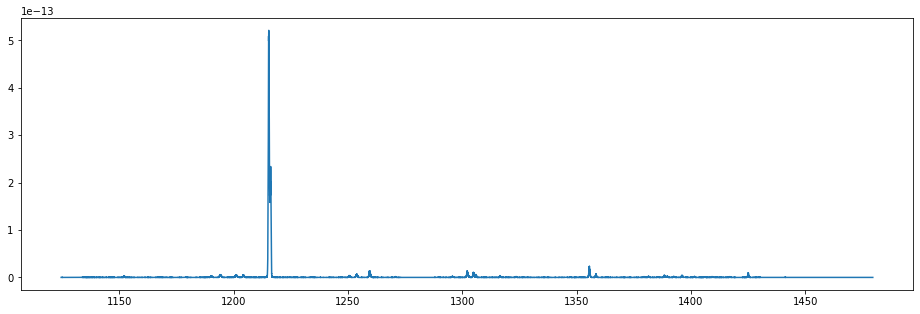

In [24]:
plt.figure(figsize=(16, 5))
plt.plot(wl,flux)
plt.show()

In [29]:
x=np.array(wl)
y=np.array(flux)
x=x.ravel()
y=y.ravel()

In [30]:
from numpy import exp, linspace, random

def gaussian(x, amp, cen, wid):
    return amp * exp(-(x-cen)**2 / wid)

In [ ]:
from scipy.optimize import curve_fit

x = linspace(-10, 10, 101)
y = gaussian(x, 2.33, 0.21, 1.51) + random.normal(0, 0.2, x.size)

In [31]:
init_vals = [1*10**-13,1300, 1]  # for [amp, cen, wid]
best_vals, covar = curve_fit(gaussian, x, y, p0=init_vals)

C:\Users\jojoa\.conda\envs\io_env\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


In [32]:
from lmfit import Model

gmodel = Model(gaussian)
print('parameter names: {}'.format(gmodel.param_names))
print('independent variables: {}'.format(gmodel.independent_vars))

parameter names: ['amp', 'cen', 'wid']
independent variables: ['x']


In [33]:
params = gmodel.make_params()
params = gmodel.make_params(cen=0.3, amp=3, wid=1.25)
x_eval = linspace(0, 10, 201)
y_eval = gmodel.eval(params, x=x_eval)

In [34]:
result = gmodel.fit(y, params, x=x)

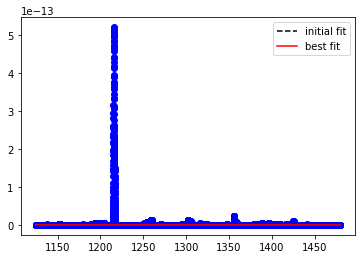

In [35]:
plt.plot(x, y, 'bo')
plt.plot(x, result.init_fit, 'k--', label='initial fit')
plt.plot(x, result.best_fit, 'r-', label='best fit')
plt.legend(loc='best')
plt.show()

In [ ]:
flux.ndim

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from astropy.table import Table
import scipy as scipy
from scipy import optimize
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import matplotlib.ticker as ticker
from tqdm import tqdm

%matplotlib inline
%config InlineBackend.figure_format='retina'

hdulist = fits.open('../data/composite_Io_eclipsed.fits')
evt_data = Table(hdulist[1].data)
image_data = hdulist[1].data
df = pd.read_csv('../data/Io_Master_Line_List (1).csv') #spaces in csv file will make df object type and not float64
line = "S I"
target_mask = df.Species.str.endswith(line) #probably a better function but idk it right now
df = df[target_mask]
df_wavelength = df['Wavelength']
df_species = df['Species']
df_results = pd.DataFrame()
problem_files = {}
wavelength_list = df_wavelength.values.tolist()

In [37]:
wl = wl.flatten()
flux = flux.flatten()
wl.ndim
wl

array([1124.57070119, 1124.58036396, 1124.59002673, ..., 1479.54219416,
       1479.55185693, 1479.5615197 ])

In [38]:
init_vals = [1*10**-14, 1300, 1]  # for [amp, cen, wid]
best_vals, covar = curve_fit(gaussian, wl, flux, p0=init_vals)

C:\Users\jojoa\.conda\envs\io_env\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


In [39]:
gmodel = Model(gaussian)
print('parameter names: {}'.format(gmodel.param_names))
print('independent variables: {}'.format(gmodel.independent_vars))

parameter names: ['amp', 'cen', 'wid']
independent variables: ['x']


In [40]:
params = gmodel.make_params()
params = gmodel.make_params(cen=0.3, amp=3, wid=1.25)
x_eval = linspace(0, 10, 201)
y_eval = gmodel.eval(params, x=x_eval)

In [41]:
result = gmodel.fit(flux, params, x=wl)

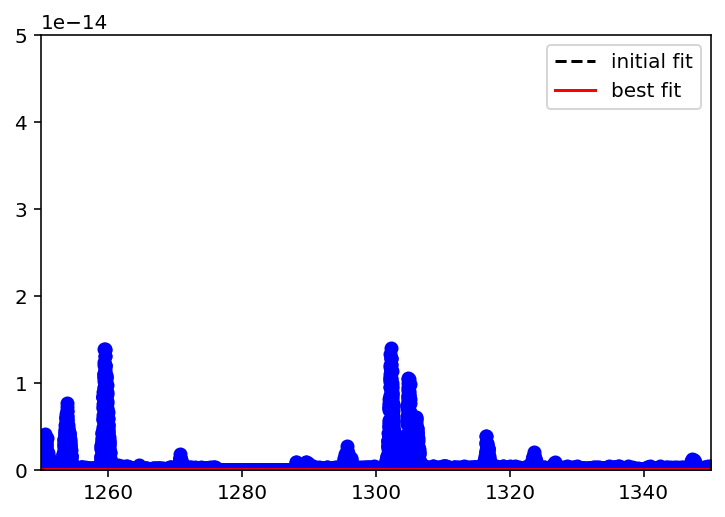

In [42]:
plt.plot(wl, flux, 'bo')
plt.plot(wl, result.init_fit, 'k--', label='initial fit')
plt.plot(wl, result.best_fit, 'r-', label='best fit')
plt.legend(loc='best')
plt.ylim(0,0.5*10**-13)
plt.xlim(1250,1350)
plt.show()